<h1 style="text-align:center;">PREDICTION MODELS FOR CUSTOMER CHURN IN SYRIATEL TELECOMMUNICATIONS COMPANY  </h1>

<div style="text-align:center;">
  <img src="Images/Telcos.jpg" alt="Telcos">
</div>

<h1 style="text-align:center;">BUSINESS UNDERSTANDING</h1>

The project endeavors to develop a predictive model for customer churn, with the primary objective of identifying customers who may be inclined to discontinue services. Stakeholders within the telecommunications industry, including marketing and sales teams, customer service departments, and upper management, stand to benefit substantially from the outcomes of the project. The project scope includes the development and evaluation of predictive models with the potential to significantly enhance customer retention and overall profitability of telcos.

<h2 style="text-align:center;">Overview of the Project</h2>



SyriaTel, a leading telecommunications firm, grapples with a customer 'churn' problem. The churn problem poses revenue and reputation risks to the company. To address this, SyriaTel seeks predictive insights and a reliable classifier model to anticipate customer churn effectively.

Specific Objectives:

1. To develop a binary classification model to predict whether a client will imminently terminate their relationship with SyriaTel.
2. Identify the factors influencing customer churn.
3. Select the optimal model for forecasting customer churn.

<h1 style="text-align:center;">DATA UNDERSTANDING</h1>

The dataset originates from SyriaTel Telecommunication company and was obtained from Kaggle (link: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data). It comprises 21 columns and 3333 rows. The columns have various attributes related to customer demographics, service usage, and churn behavior. The rows correspond to a recorded customer. The dataset encompasses both continuous and categorical variables. The target variable identified is "churn," with the remaining variables serving as predictors, excluding "state" and "phone number."

<h1 style="text-align:center;">DATA PREPARATION</h1>

<h2 style="text-align:center;">Exploratory Data Analysis (EDA) </h2>


 Performing exploratory data analysis (EDA) on the SyriaTel dataset is a very important technique to check for patterns or insights useful for predicting churn. Some steps of EDA include Data Visualization and Correlation Analysis.

In [32]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset from the 'Data' folder
data = pd.read_csv('Data/SyriaTel_Customer_Churn.csv')

# Display the first few rows of the dataset
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Descriptive Statstics: Check the summary statistics of numerical values in the dataset and handle them appropriately.

In [3]:
# Summary statistics

data.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Handle Missing Values: Check for missing values in the dataset and handle them appropriately (imputation, deletion, or other methods).

In [4]:
# Check for missing values

data.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing or NAN values in the Dataset as seen from the above output.

In [5]:
# Check data types of columns
data.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

 To be able to conduct other important EDA techniques, one esseniatial step is to convert the 'churn' column to integer by replacing 'True' with 1 and 'False' with 0.

In [6]:
# Convert 'churn' column to integer
data['churn'] = data['churn'].astype(int)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Data Visualization: 

Visualizations such as histograms, bar charts, box plots, and scatter plots are useful to be able to understand the distribution and relationships between different variables in the SyriaTel dataset.

In [7]:
# Check the distribution of the target variable 'Churn'

# Check the distribution of the target variable 'Churn'
churn_counts = data['churn'].value_counts()

# Print the counts and percentages of churn
total_samples = len(data)
for churn_status, count in churn_counts.items():
    percentage = (count / total_samples) * 100
    print(f"Churn: {churn_status}, Count: {count}, Percentage: {percentage:.2f}%")


Churn: 0, Count: 2850, Percentage: 85.51%
Churn: 1, Count: 483, Percentage: 14.49%


Imbalanced Dataset: The dataset has a class imbalance, with churners comprising only 14% of the total records.


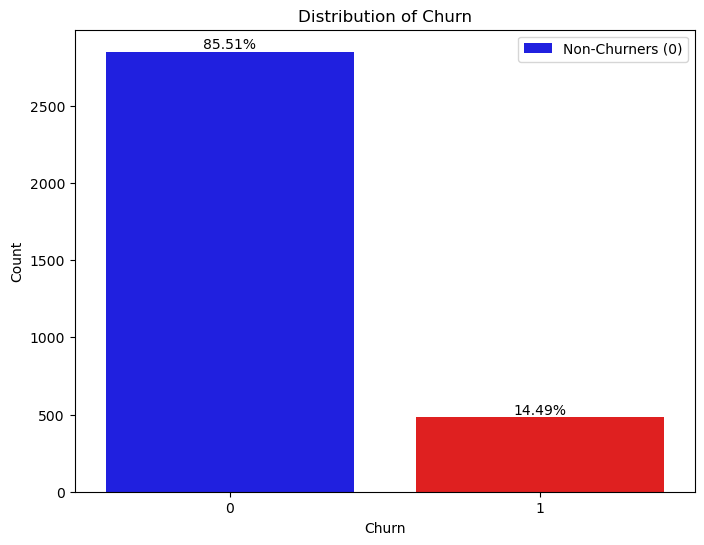

In [8]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=data, palette=['blue', 'red'])

# Calculate and display percentages on the bars
for i, count in enumerate(churn_counts):
    percentage = (count / total_samples) * 100
    plt.text(i, count, f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Add legend
plt.legend(labels=['Non-Churners (0)', 'Churners (1)'])

plt.show()


 A Correlation Analysis computes correlation coefficients between numerical variables with the target variable 'churn" with a view to identify potential linear relationships.

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64


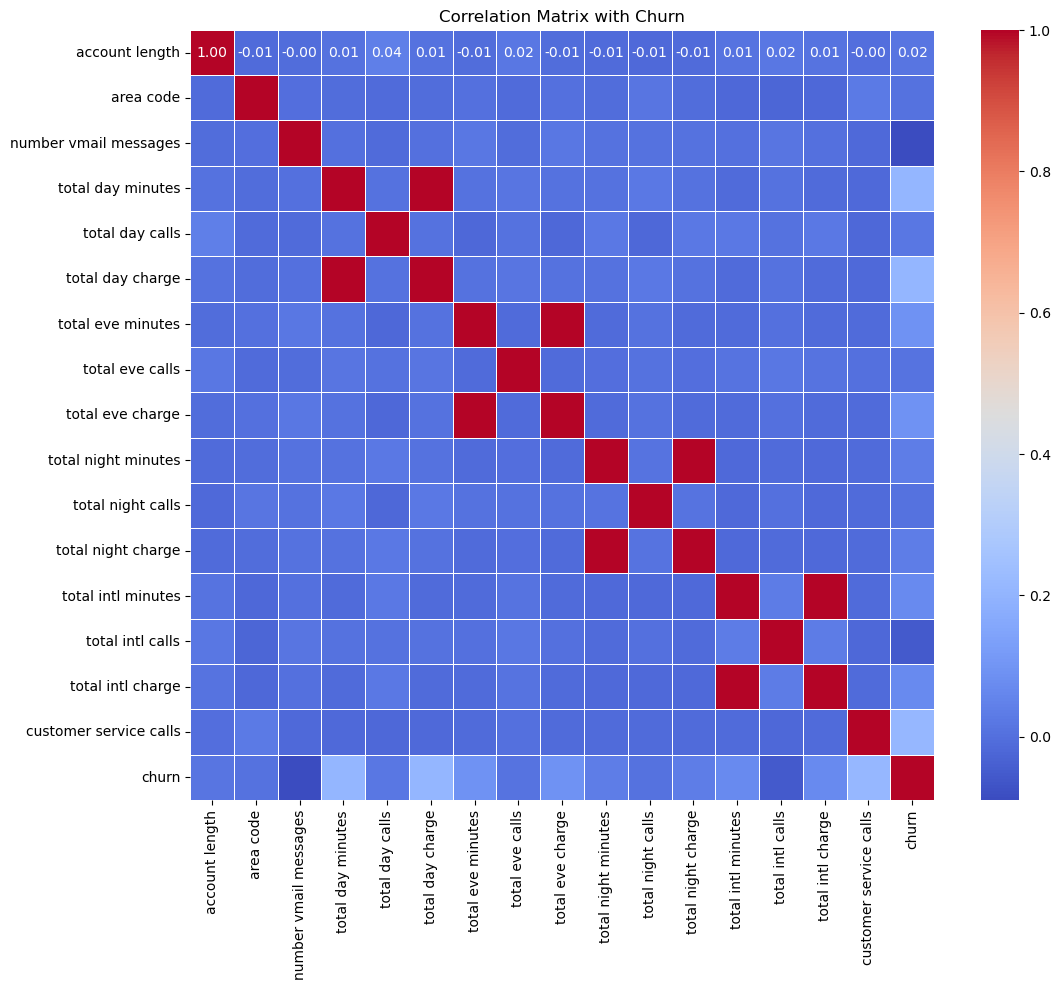

In [9]:
# Explore the relationship between numerical variables and the target variable 'Churn'

# Select numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Add 'churn' to the numerical columns
numerical_columns = numerical_columns.append(pd.Index(['churn']))

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Print correlation coefficients with respect to 'churn'
print(correlation_matrix['churn'].sort_values(ascending=False))

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix with Churn')
plt.show()

Feature Importance/Selection:


Based on the correlation analysis, the most influential features in predicting churn include:
* Customer service calls. 
* Total day minutes.
* Total day charge. 
* Total eve minutes. 

Therefore, these features could be prioritized in feature selection for building predictive models. 

Additionally, total international charge and total international minutes, although less significant, could also contribute to predicting churn. Conversely, features with weak correlations like account length and area code may not be as informative for predicting churn and may be considered less important in feature selection.

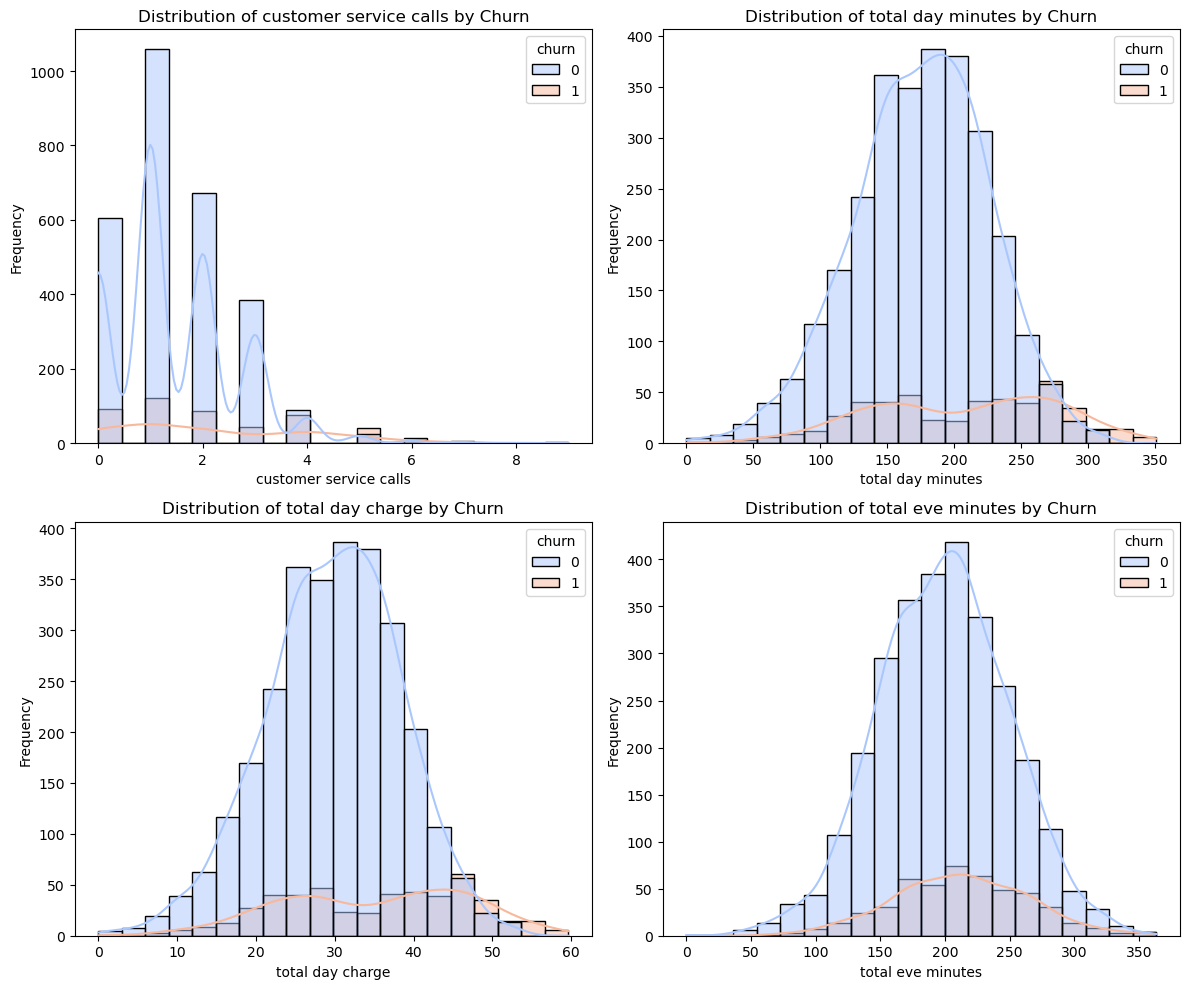

In [10]:

# Define the numerical variables to plot
numerical_vars = ['customer service calls', 'total day minutes', 'total day charge', 'total eve minutes']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()
# Define custom color palette with distinct blue and red tones
# custom_palette = {"Churned": "red", "Not Churned": "blue"}

# Plot histograms for each numerical variable with respect to 'Churn'
for i, var in enumerate(numerical_vars):
    sns.histplot(data=data, x=var, hue='churn', ax=axes[i], kde=True, palette='coolwarm', bins=20)
    axes[i].set_title(f'Distribution of {var} by Churn')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


The histograms help us to understand the central tendency, spread, and shape of the data distribution. This understanding is crucial for selecting appropriate predictive modeling techniques and interpreting model outputs.

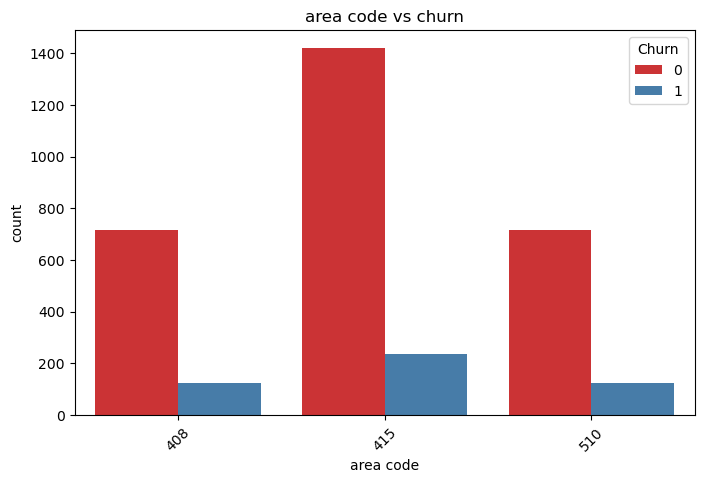

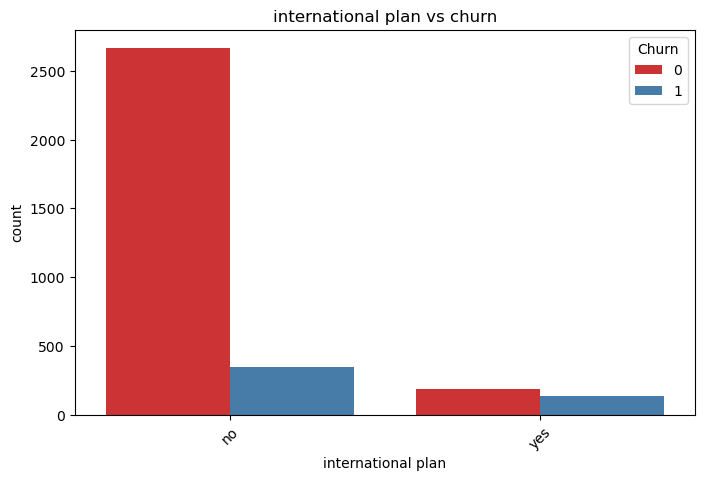

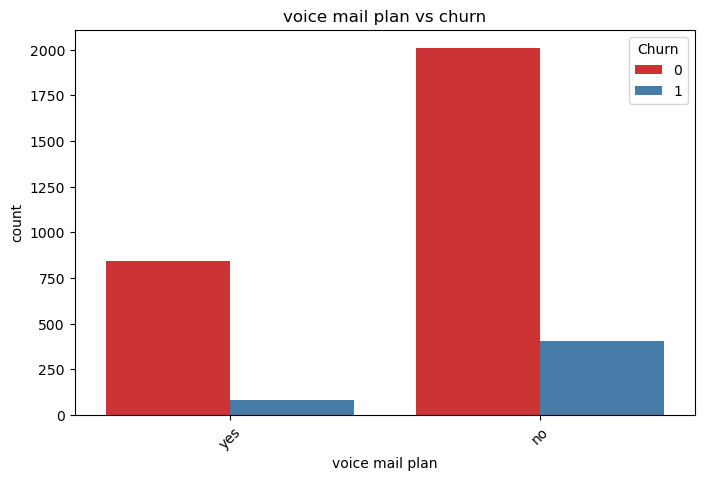

In [11]:
# Explore the relationship between categorical variables and the target variable 'Churn'

# Convert boolean values in 'churn' column to strings
data['churn'] = data['churn'].astype(str)

# Select relevant categorical columns excluding 'churn'
categorical_cols = ['area code', 'international plan', 'voice mail plan']


# Create countplots for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='churn', data=data, palette='Set1')
    plt.title(f'{col} vs churn')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')
    plt.show()



These insights suggest that international plan status and area code could be important features to consider in predicting customer churn. Further analysis and modeling can help validate the significance of these features and identify additional factors contributing to churn.

In terms of feature importance/selection:

* The international plan appears to be a significant predictor of churn, as customers without this plan tend to churn more.
* Area code may also play a role in churn prediction, with certain area codes experiencing higher churn rates.
* The presence or absence of a voice mail plan might have some influence on churn but may not be as impactful as other factors.

<h3 style="text-align:center;">Data Preprocessing </h3>


To prepare the dataset for classification models like Logistic Regression with 'Churn' as the target variable, we need to perform several preprocessing steps. Here's what you can do based on the data types and characteristics of the dataset.

Handle Phone Number and State Columns:

Since the 'phone number' and 'state' columns are unlikely to contribute to the prediction task, they should be dropped from the dataset.

In [12]:
# Remove irrelevant columns
irrelevant_cols = ['state', 'phone number']  # Irrelevant columns
data.drop(columns=irrelevant_cols, inplace=True)

When training a predictive model, it's essential to address class imbalance to prevent the model from being biased towards the majority class. The SyriaTel dataset, as revealed earlier, has class imbalance. Techniques to handle class imbalance include:

* Feature Engineering to create two new features:

1. total_minutes: Summing up the total minutes for day, evening, night, and international calls.
2. interaction_minutes_calls: Calculating the interaction between the total day minutes and customer service calls.

* Using SMOTE: Synthetic Minority Over-sampling Technique (SMOTE) to address the class imbalance problem by oversampling the minority class (churners) in the training set.

In [13]:
# Feature Engineering to handle class imbalance
# To create a new feature 'total_minutes' by summing up all the minutes (day, evening, night, and international)
data['total_minutes'] = data['total day minutes'] + data['total eve minutes'] + data['total night minutes'] + data['total intl minutes']

# The interaction between 'total_day_minutes' and 'customer_service_calls'
data['interaction_minutes_calls'] = data['total day minutes'] * data['customer service calls']
data.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,interaction_minutes_calls
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,717.2,265.1
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,625.2,161.6
2,137,415,no,no,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,539.4,0.0
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,564.8,598.8
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,0,512.0,500.1


Convert Categorical Variables to Numeric:

Convert categorical variables such as 'area code', 'international plan', and 'voice mail plan' into numerical format using techniques like one-hot encoding. This is necessary because most machine learning algorithms, including Logistic Regression, require numerical inputs.

Encode categorical variables and split the data

In [14]:
# Convert categorical variables using one-hot encoding
categorical_cols = ['area code', 'international plan', 'voice mail plan']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the data into train and test sets
X = data_encoded.drop(columns=['churn'])
y = data_encoded['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardization/Normalization:

Scale the numeric features to ensure that all features contribute equally to the model fitting process. This can be achieved through standardization or normalization.

Standardize the features

In [15]:
# Scale the numeric features using StandardScaler()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Handling Class Imbalance using SMOTE to address the class imbalance problem by oversampling the minority class (churners) in the training set.

In [16]:
# Using SMOTE technique to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<h1 style="text-align:center;">MODELING</h1>


<h3 style="text-align:center;">1. Baseline Model - Logistic Regression </h3>

In [17]:
# Baseline Model (Interpretable): Logistic Regression
baseline_model = LogisticRegression()

# Fitting the model on the training data
baseline_model.fit(X_train_resampled, y_train_resampled)


LogisticRegression()

Evaluate the baseline model

In [18]:
# Generating Predictions using the test set data
baseline_pred = baseline_model.predict(X_test)

# Evaluating Performance metrics of the Model Predictions on the test set data
print("Baseline Model:")
print("Accuracy:", accuracy_score(y_test, baseline_pred))
print("Precision:", precision_score(y_test, baseline_pred, pos_label='1'))
print("Recall:", recall_score(y_test, baseline_pred, pos_label='1'))
print("F1 Score:", f1_score(y_test, baseline_pred, pos_label='1'))


Baseline Model:
Accuracy: 0.8290854572713643
Precision: 0.4644808743169399
Recall: 0.8415841584158416
F1 Score: 0.5985915492957746


For the Baseline Logistic Regression Model:

* Accuracy: The accuracy of the model is approximately 82.91%. This indicates that the model correctly predicts the churn or non-churn status of around 82.91% of the customers in the test set.

* Precision: The precision of the model is approximately 46.45%. Precision measures the proportion of true positive predictions among all positive predictions made by the model. In this context, it means that out of all the customers the model predicted to churn, around 46.45% actually churned.

* Recall: The recall of the model is approximately 84.16%. Recall, also known as sensitivity, measures the proportion of actual positives that were correctly predicted by the model. In this context, it means that out of all the customers who actually churned, around 84.16% were correctly identified by the model.

* F1 Score: The F1 score, which is the harmonic mean of precision and recall, is approximately 59.86%. It provides a balance between precision and recall. A higher F1 score indicates better performance, considering both false positives and false negatives.

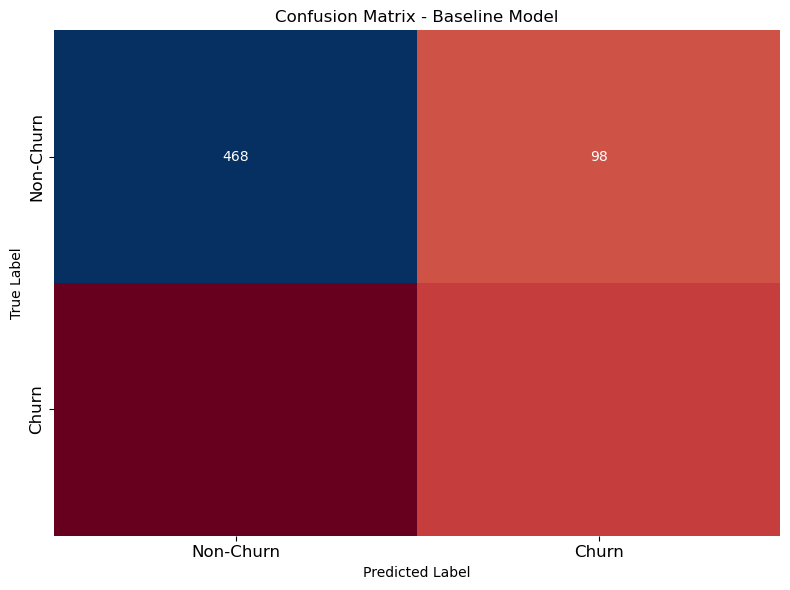

In [19]:
# Vizualization of the confusion matrix
conf_matrix = confusion_matrix(y_test, baseline_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdBu', cbar=False)
plt.title('Confusion Matrix - Baseline Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'] , fontsize=12)

plt.tight_layout()

plt.show()

The confusion matrix provides a tabular representation of the model's predictions versus the actual labels. In this case:

* True Negatives (TN): 468 - The number of customers correctly predicted as non-churners.
* False Positives (FP): 98 - The number of customers incorrectly predicted as churners.
* False Negatives (FN): 16 - The number of customers incorrectly predicted as non-churners.
* True Positives (TP): 85 - The number of customers correctly predicted as churners.

Overall, the model shows relatively high recall, indicating that it's effective at capturing churners. However, the precision is lower, suggesting that there's a significant number of false positive predictions, where customers were predicted to churn but did not. This imbalance between precision and recall could be further addressed and optimized in the model. A more complex Model such as Random Forest may give better performance.

 
<h3 style="text-align:center;">2. More-complex Model - Random Forest Model </h3>


In [20]:
# Complex Model: Random Forest
complex_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model on the training data
complex_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

Evaluate the complex model

In [21]:
# Generating Predictions using the test set data
complex_pred = complex_model.predict(X_test)

# Evaluating Performance metrics of the Model Predictions on the test set data
print("\nMore-complex Model:")
print("Accuracy:", accuracy_score(y_test, complex_pred))
print("Precision:", precision_score(y_test, complex_pred, pos_label='1' ))
print("Recall:", recall_score(y_test, complex_pred, pos_label='1'))
print("F1 Score:", f1_score(y_test, complex_pred, pos_label='1'))


More-complex Model:
Accuracy: 0.9610194902548725
Precision: 0.9310344827586207
Recall: 0.801980198019802
F1 Score: 0.8617021276595744


For the Random Forest model:

* Accuracy: The accuracy of the model is 96.10%. This indicates the proportion of correctly predicted outcomes (both true positives and true negatives) out of the total number of predictions.

* Precision: The precision of the model is 93.10%. Precision represents the proportion of true positive predictions out of all positive predictions (both true positives and false positives). In other words, it measures how precise the model is in predicting the positive class (churn) when it predicts it.

* Recall: The recall of the model is 80.20%. Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive cases (churn) that the model correctly identifies as positive. It indicates the model's ability to capture all positive instances.

* F1 Score: The F1 score, which is the harmonic mean of precision and recall, is 86.17%. It provides a balance between precision and recall and is especially useful when dealing with imbalanced datasets.

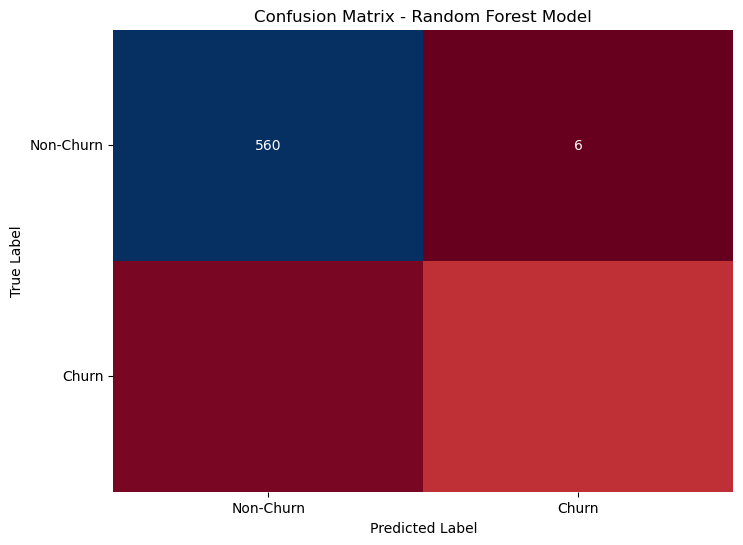

In [22]:
# Vizualizing of the confusion matrix
conf_matrix = confusion_matrix(y_test, complex_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdBu', cbar=False)
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'], rotation=0)

plt.show()

The Confusion Matrix for Random Forest Model:

* The top-left cell (560) represents the number of true negatives (non-churn customers) that are correctly classified by the model.
* The top-right cell (6) represents the number of false positives (non-churn customers incorrectly classified as churn).
* The bottom-left cell (20) represents the number of false negatives (churn customers incorrectly classified as non-churn).
* The bottom-right cell (81) represents the number of true positives (churn customers) that are correctly classified by the model.

Overall, the Random Forest model demonstrates superior performance across all metrics compared to the Logistic Regression model. It achieves higher accuracy, precision, and F1 score, although it has a slightly lower recall. This suggests that the Random Forest model is more effective than the Baseline Logistic Regression model in accurately identifying churn customers while maintaining a high level of precision. However, training an XGBoost model after the Random Forest Model to see if it provides further improvement in performance is essential.

<h3 style="text-align:center;">3. XGBoost Model </h3>

In [23]:
# Converting classes to integers before training the XGBoost model
y_train_resampled = y_train_resampled.astype(int)

# Training the XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [24]:
# Evaluation of the XGBoost Model

# Model Performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Convert true labels (y_test) to integers
    y_test_int = y_test.astype(int)

    # Evaluate model performance using integer true labels
    accuracy = accuracy_score(y_test_int, y_pred)
    precision = precision_score(y_test_int, y_pred)
    recall = recall_score(y_test_int, y_pred)
    f1 = f1_score(y_test_int, y_pred)
    roc_auc = roc_auc_score(y_test_int, y_pred)
    confusion_mat = confusion_matrix(y_test_int, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc, confusion_mat

# Evaluate XGBoost Model
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb, confusion_mat_xgb = evaluate_model(xgb_model, X_test, y_test)

# Print model performance metrics
print("\nXGBoost Model Performance:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)


XGBoost Model Performance:
Accuracy: 0.9640179910044977
Precision: 0.9529411764705882
Recall: 0.801980198019802
F1 Score: 0.8709677419354839


The XGBoost model outperforms both the Random Forest and Baseline Logistic Regression models in terms of perfomance metrics such as accuracy, precision, recall, F1 score. 

Comparison:
* Accuracy: XGBoost (0.964) > Random Forest (0.961) > Logistic Regression (0.829)
* Precision: XGBoost (0.953) > Random Forest (0.931) > Logistic Regression (0.464)
* Recall: Logistic Regression (0.842) > XGBoost (0.802) = Random Forest (0.802)
* F1 Score: XGBoost (0.871) > Random Forest (0.862) > Logistic Regression (0.599)

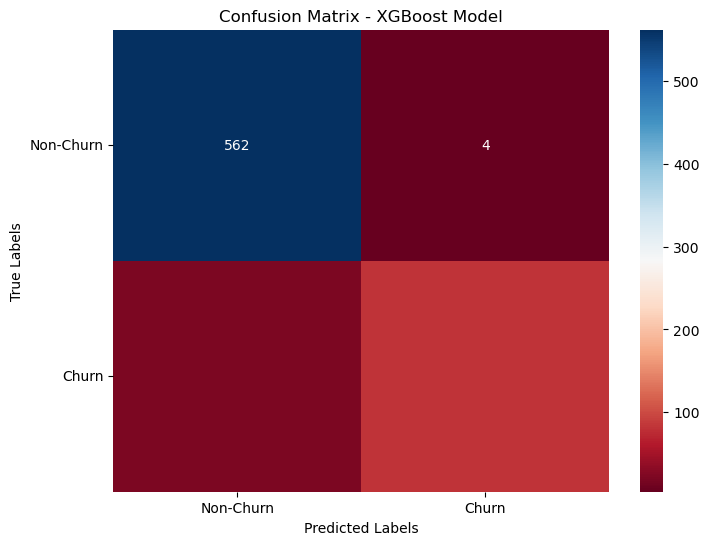

In [25]:
# Plotting the confusion matrix for XGBoost model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_xgb, annot=True, cmap='RdBu', fmt='d')
plt.title('Confusion Matrix - XGBoost Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'], rotation=0)

plt.show()

The confusion matrix for the XGBoost model indicates:

* True Negative (TN): 562 instances were correctly predicted as negative (no churn).
* False Positive (FP): 4 instances were incorrectly predicted as positive (churn) while they were actually negative.
* False Negative (FN): 20 instances were incorrectly predicted as negative (no churn) while they were actually positive.
* True Positive (TP): 81 instances were correctly predicted as positive (churn).

Overall, the XGBoost m model demonstrates a good ability to correctly identify both churn and non-churn instances as compared to the Baseline Logistic Regression Model and the Random Forest Model. However, there is still room for improvement, particularly in reducing false negatives and false positives. A final model which includes Hyperparameter Tuning such as Grid Search for Decision Tree can help in further improvement on the XGBoost model.

<h3 style="text-align:center;">4. Model with Tuned Hyperparameters - Random Forest Model (Tuned) </h3>

In [26]:
# Hyperparameter Tuning: Grid Search for Random Forest Model

# Define the parameter distributions for randomized search
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest
    'max_depth': [None, 10, 20],         # Maximum depth of the trees
    'min_samples_split': randint(2, 10), # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 4)     # Minimum number of samples required to be at a leaf node
}

# Randomized Search for Random Forest Model
random_search = RandomizedSearchCV(estimator=complex_model, param_distributions=param_dist, 
                                   scoring='f1', cv=5, n_iter=10, random_state=42)
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
best_params = random_search.best_params_


In [27]:
# Print the best parameters for Randomized Search
print("Best Parameters for Random Forest Model:", best_params)

Best Parameters for Random Forest Model: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}


In [28]:
# Get the best estimator from the random search
best_rf_model = random_search.best_estimator_

# Predict using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate model performance
accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf, confusion_mat_rf = evaluate_model(best_rf_model, X_test, y_test)


# Print performance metrics
print("Performance Metrics of Tuned Random Forest Model Using Randomized Search:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Performance Metrics of Tuned Random Forest Model Using Randomized Search:
Accuracy: 0.952023988005997
Precision: 0.8631578947368421
Recall: 0.8118811881188119
F1 Score: 0.8367346938775511


Comparing the performance metrics between the Tuned Random Forest Model using Randomized Search and the XGBoost Model:

* Accuracy: The XGBoost model has slightly higher accuracy compared to the Tuned Random Forest model.
* Precision: The precision of both models is quite high, but the XGBoost model has a slightly higher precision.
* Recall: The recall of the XGBoost model is slightly lower than that of the Tuned Random Forest model.
* F1 Score: The F1 score of the XGBoost model is slightly higher than that of the Tuned Random Forest model.

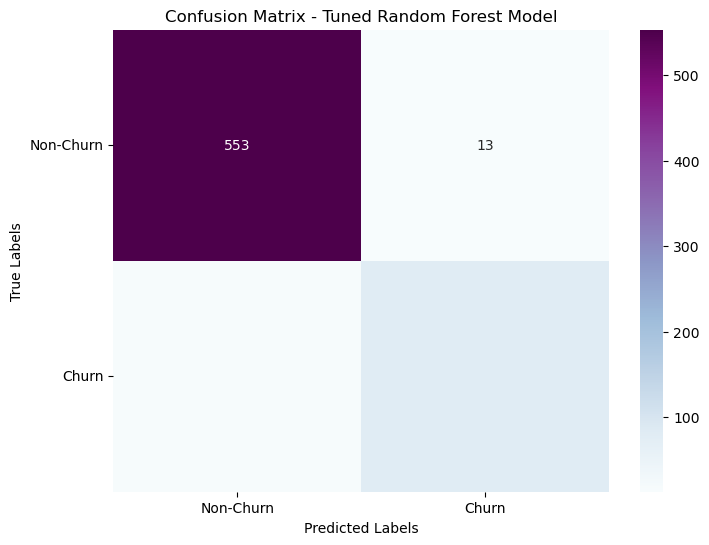

In [29]:
# Plotting the confusion matrix for the Tuned Random Forest Model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_rf, annot=True, cmap='BuPu', fmt='d')
plt.title('Confusion Matrix - Tuned Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Churn', 'Churn'], rotation=0)

plt.show()

The Tuned Random Forest Model has 553 true negatives and 82 true positives. It misclassifies 13 instances as negative (false negatives) and 19 instances as positive (false positives).

Baseline Model (Logistic Regression) ROC AUC Score: 0.8760
More-complex Model (Random Forest) ROC AUC Score: 0.9249
XGBoost Model ROC AUC Score: 0.9294
Tuned Random Forest Model ROC AUC Score: 0.9222


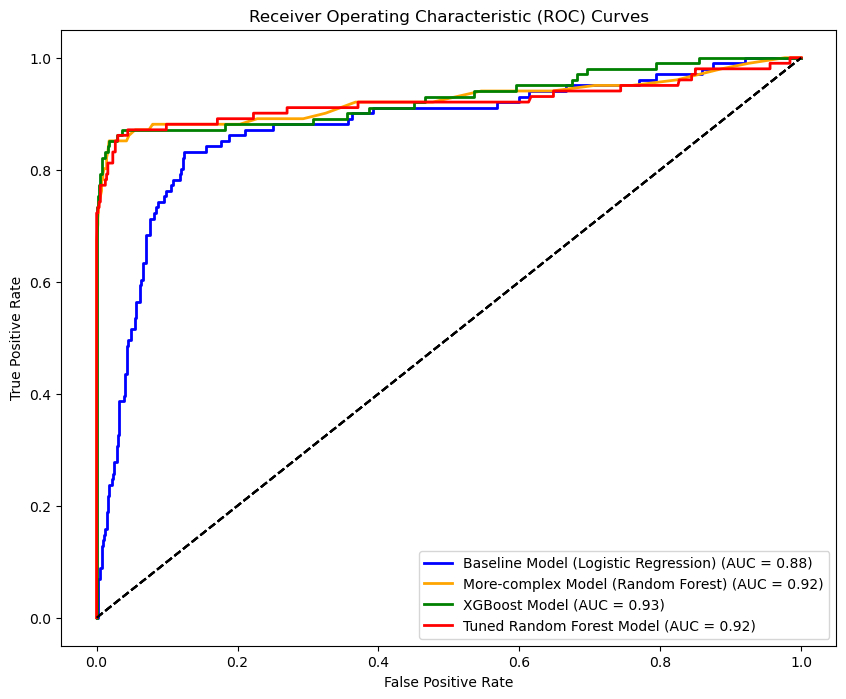

In [30]:
# Define models and their labels
models = [baseline_model, complex_model, xgb_model, best_rf_model]
model_labels = ['Baseline Model (Logistic Regression)', 'More-complex Model (Random Forest)', 'XGBoost Model', 'Tuned Random Forest Model']

# Convert y_test to integer values
y_test_int = y_test.astype(int)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

# Calculate ROC curves and AUC scores for each model
for model, label, color in zip(models, model_labels, ['blue', 'orange', 'green', 'red']):
    # Generate model predictions
    y_score = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_int, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='{} (AUC = {:.2f})'.format(label, roc_auc), color=color)

    # Plot the ROC curve for random guessing
    # Random guessing
    random_guess_fpr = [0, 1]
    random_guess_tpr = [0, 1]
    plt.plot(random_guess_fpr, random_guess_tpr, linestyle='--', color='black')


    # Print ROC AUC score
    print(f'{label} ROC AUC Score: {roc_auc:.4f}')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()



The ROC AUC (Receiver Operating Characteristic - Area Under the Curve) score is a metric used to evaluate the performance of a classification model. It measures the area under the ROC curve, which is a graphical representation of the model's performance across various threshold settings. The Graph shows the plots of the various curves with a random guessing curve represented by the straight dotted line curve. The XGBoost Model has the highest ROC AUC Score of approximately 0.93 followed by the Tuned Random Forest and the Random Forest Models with 0.92. The Baseline Logistic Regression Model has the lowest score of 0.88.

<h1 style="text-align:center;">EVALUATION</h1>

Evaluating the Models based on the performance metrics of accuracy, precision, recall, and F1 score:

1. The Baseline Logistic Regression Model has the lowest performance across all metrics with Accuracy score of 0.829, Precision: 0.464, Recall: 0.842 and F1 Score: 0.599.
2. The More-complex Random Forest Model and the XGBoost Model perform similarly in terms of accuracy, precision, recall, and F1 score. However, the XGBoost Model has a slightly higher precision and F1 score of 0.953 and 0.871 respectively compared to 0.931 and 0.862 of Random Forest Model.
3. The Tuned Random Forest Model Using Randomized Search performs slightly worse than the XGBoost Model in terms of precision, recall, and F1 score, but it is still significantly better than the Baseline Logistic Regression Model.

Overall, the XGBoost Model appears to be the best performer among the four models based on the provided metrics. The performance metric of accuracy measures overall correctness, precision measures the model's ability to avoid false positives, recall measures the model's ability to capture positive instances, and the F1 score provides a balanced evaluation of precision and recall. These metrics help assess different aspects of a classification model's performance and are crucial for model evaluation and comparison.

Evaluating the Models based on the confusion matrices visualized in the modelling section:

1. The model with the highest number of true positives (TP) and true negatives (TN) relative to false positives (FP) and false negatives (FN) would generally be considered to perform the best.

2. The XGBoost Model appears to have the best overall performance, as it has the highest number of true positives (81) and true negatives (562) with relatively low false positives (4) and false negatives (20).

In the context of churn prediction, True positives (TP) are customers correctly identified as likely to churn. True negatives (TN) are customers correctly identified as unlikely to churn. False positives (FP) are customers incorrectly identified as likely to churn when they are not. False negatives (FN) are customers incorrectly identified as unlikely to churn when they actually do churn.

Evaluating the Models based on the ROC AUC (Receiver Operating Characteristic - Area Under the Curve) metric:

1. The Baseline Model using Logistic Regression achieved an ROC AUC score of 0.8760. 
This indicates that the model performs reasonably well in distinguishing between the positive and negative classes.

2. The More-complex Model using Random Forest achieved an ROC AUC score of 0.9249.
Compared to the Baseline Model, the Random Forest model shows an improvement in performance, as indicated by the higher ROC AUC score.

3. The XGBoost Model achieved an ROC AUC score of 0.9294. This model shows a further improvement in performance compared to both the Baseline Model and the More-complex Model using Random Forest.

4. The Tuned Random Forest Model achieved an ROC AUC score of 0.9222. Despite being tuned, this model's performance, as measured by the ROC AUC score, is slightly lower than the XGBoost Model but still higher than the Baseline Model and the More-complex Random Forest Model.

In summary, based on the ROC AUC scores, the XGBoost Model appears to be the best-performing model among the ones evaluated, followed closely by the More-complex Random Forest Model, the Tuned Random Forest Model, and finally, the Baseline Model using Logistic Regression. However, it's essential to consider other metrics and practical implications when selecting the best model for a specific application.

<h1 style="text-align:center;">CONCLUSION</h1>

The technical exploration into predictive analytics for customer churn management in SyriaTel's telecommunications data has revealed significant insights. Modeling various machine learning algorithms, including Logistic Regression, Random Forest, XGBoost, and Tuned Random Forest reaveals actionable outcomes. Among these, XGBoost consistently outperformed other models across multiple evaluation metrics, demonstrating its superiority in predicting customer churn. Leveraging advanced techniques such as feature selection and evaluation metrics like ROC AUC, the analysis underscores the importance of predictive analytics in identifying churn patterns and enhancing customer retention strategies.

Next Steps:

* Conduct deeper analysis: Explore additional data sources and factors influencing churn, such as customer demographics or usage patterns, to enhance predictive accuracy and identify new insights.
* Address model limitations: Address potential biases or limitations in the dataset, such as data imbalance or missing features , through data preprocessing techniques and model refinement to improve predictive performance and reliability